<a href="https://colab.research.google.com/github/YazMRRS/FisicaComputacional1/blob/master/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

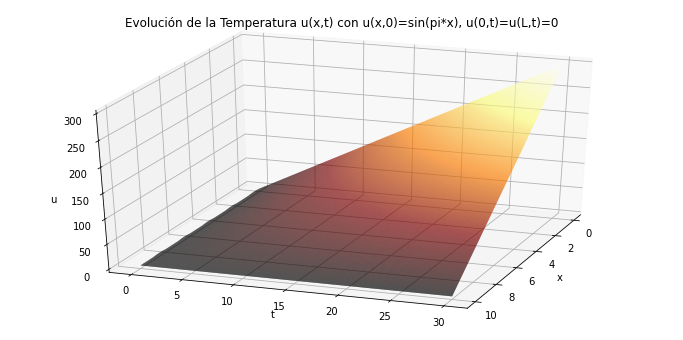

dt/dx**2 < 0.5? 0.002


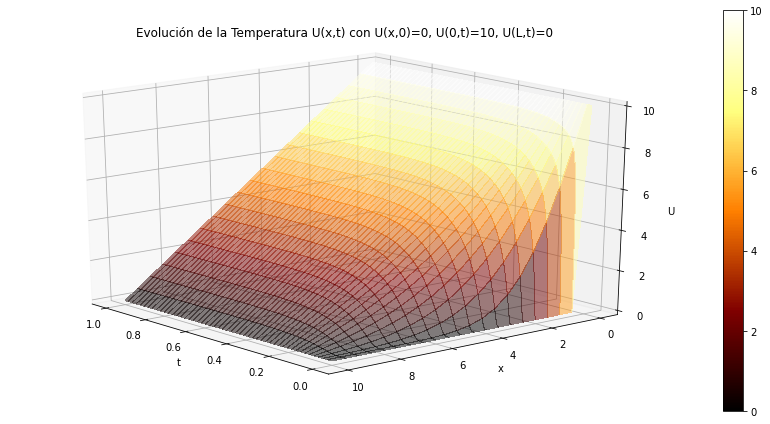

In [6]:
#Ejercicio1 
#Caso a)

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 10
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=100
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-2):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 10
# Tiempo inicial y final
t0 = 0
tf = 30.0

# Número de puntos en la dirección x
N = 400
# Tamaño de delta x
h = (b-a)/(N-1)

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 800);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

#Metodo de diferencias finitas 
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 1.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 100.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.zeros(xspan.shape)
#U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10, U(L,t)=0')

# Punto del observador 
ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()

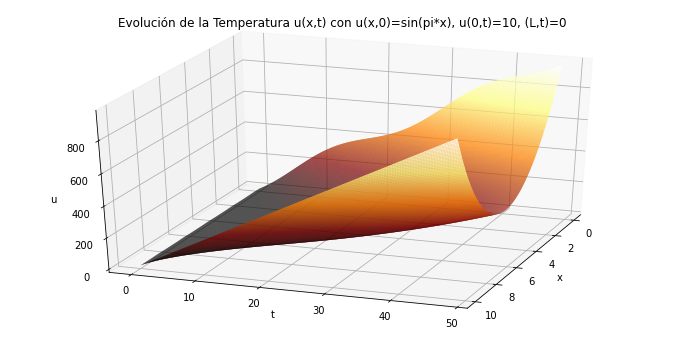

dt/dx**2 < 0.5? 0.096


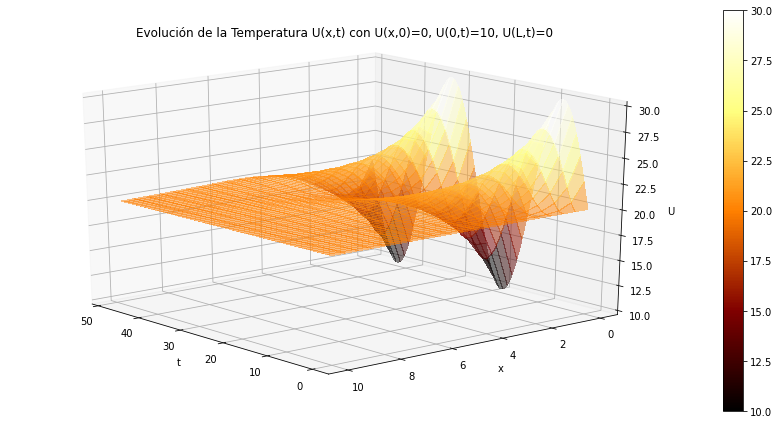

In [7]:
#Ejercicio1 
#Caso b)

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)+20

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 20+10*np.sin(np.pi*t/12)
    dudt[-1] = 20 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.25
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1]) / h**2)
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 10
# Tiempo inicial y final
t0 = 0
tf = 48.0

# Número de puntos en la dirección x
N = 400
# Tamaño de delta x
h = (b-a)/(N-1)

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 400);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10, (L,t)=0')
plt.show()

#Metodo de diferencias finitas 
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 48.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.zeros(xspan.shape)+20
#U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 20+10*np.sin(np.pi*tspan/(12))
U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10, U(L,t)=0')

# Punto del observador 
ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 46.08


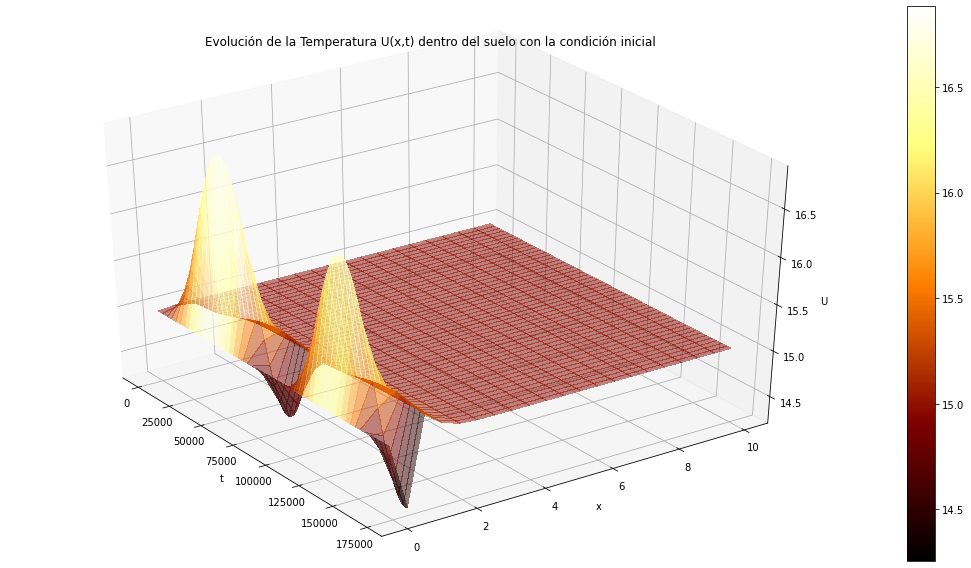

In [14]:
#Ejercicio2

#Metodo de diferencias finitas 
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en el tiempo

x0 = 0.0
xL = 10.0 # Longitud de la barra

t0 = 0.0
tF = 172800 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = 15.0*np.ones(xspan.shape)

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
# Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(15,8))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial')

# Punto del observador 
ax.view_init(elev=35, azim=-35)

plt.tight_layout()
plt.show()